In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_fake= pd.read_csv("C:/Users/ayana/Downloads/Fake news detection/Fake.csv")
data_true= pd.read_csv("C:/Users/ayana/Downloads/Fake news detection/True.csv")

In [3]:
data_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
data_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
data_fake["class"] = 0
data_true["class"] = 1

In [6]:
data_fake.shape, data_true.shape

((23481, 5), (21417, 5))

In [7]:
data = pd.concat([data_fake, data_true], ignore_index=True)

In [8]:
#Mélanger les données
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

In [9]:
data

,title,text,subject,date,class
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",US_News,"February 13, 2017",0
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"April 5, 2017",1
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,"September 27, 2017",1
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",News,"May 22, 2017",0
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",politicsNews,"June 24, 2016",1
...,...,...,...,...,...
44893,UNREAL! CBS’S TED KOPPEL Tells Sean Hannity He...,,politics,"Mar 27, 2017",0
44894,PM May seeks to ease Japan's Brexit fears duri...,LONDON/TOKYO (Reuters) - British Prime Ministe...,worldnews,"August 29, 2017",1
44895,Merkel: Difficult German coalition talks can r...,BERLIN (Reuters) - Chancellor Angela Merkel sa...,worldnews,"November 16, 2017",1
44896,Trump Stole An Idea From North Korean Propaga...,Jesus f*cking Christ our President* is a moron...,News,"July 14, 2017",0


In [10]:
print(data['class'].value_counts())

class
0    23481
1    21417
Name: count, dtype: int64


In [11]:
data.isnull().sum()

title      0
text       0
subject    0
date       0
class      0
dtype: int64

In [12]:
data = data.drop(['title','subject','date'], axis=1)

In [13]:
data.head()

,text,class
0,"21st Century Wire says Ben Stein, reputable pr...",0
1,WASHINGTON (Reuters) - U.S. President Donald T...,1
2,(Reuters) - Puerto Rico Governor Ricardo Rosse...,1
3,"On Monday, Donald Trump once again embarrassed...",0
4,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",1


In [14]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ayana\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ayana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[\\*.,!?;:()\"\'-]', '', text)  
    text = re.sub(r'\s+', ' ', text)  
    text = re.sub(r'[^a-z\s]', '', text)  
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

data['clean_text'] = data['text'].apply(preprocess_text)
print(data[['text', 'clean_text']].head())

                                                text  \
0  21st Century Wire says Ben Stein, reputable pr...   
1  WASHINGTON (Reuters) - U.S. President Donald T...   
2  (Reuters) - Puerto Rico Governor Ricardo Rosse...   
3  On Monday, Donald Trump once again embarrassed...   
4  GLASGOW, Scotland (Reuters) - Most U.S. presid...   

                                          clean_text  
0  st century wire says ben stein reputable profe...  
1  washington reuters us president donald trump r...  
2  reuters puerto rico governor ricardo rossello ...  
3  monday donald trump embarrassed country accide...  
4  glasgow scotland reuters us presidential candi...  


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer(max_features=5000)  
X = vectorization.fit_transform(data['clean_text']).toarray()
y = data['class']

import joblib
joblib.dump(vectorization, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.linear_model import LogisticRegression


Lr = LogisticRegression()
Lr.fit(X_train, y_train)


LogisticRegression()

In [19]:
pred_lr = Lr.predict(X_test)

In [20]:
Lr.score(X_test,y_test)

0.9865256124721603

In [21]:
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, pred_lr))
print(classification_report(y_test, pred_lr))

Accuracy: 0.9865256124721603
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4710
           1       0.98      0.99      0.99      4270

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [22]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [23]:
pred_dt = DT.predict(X_test)

In [24]:
print("Accuracy:", accuracy_score(y_test, pred_dt))

Accuracy: 0.9956570155902005


In [25]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4710
           1       1.00      0.99      1.00      4270

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



In [26]:
dt = DecisionTreeClassifier(
    max_depth=8,            
    min_samples_split=5,     
    min_samples_leaf=2,      
    random_state=42
)

dt.fit(X_train, y_train)
pred_dt = DT.predict(X_test)
print("Accuracy:", accuracy_score(y_test, pred_dt))
print(classification_report(y_test, pred_dt))

Accuracy: 0.9956570155902005
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4710
           1       1.00      0.99      1.00      4270

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



In [27]:
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier()
GB.fit(X_train,y_train)

GradientBoostingClassifier()

In [28]:
pred_gb = GB.predict(X_test)

In [29]:
GB.score(X_test,y_test)

0.994988864142539

In [30]:
print("Accuracy:", accuracy_score(y_test, pred_gb))

Accuracy: 0.994988864142539


In [31]:
print(classification_report(y_test, pred_gb))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4710
           1       0.99      1.00      0.99      4270

    accuracy                           0.99      8980
   macro avg       0.99      1.00      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [32]:
gb = GradientBoostingClassifier(
    n_estimators=100,       
    learning_rate=0.05,     
    max_depth=5,           
    min_samples_split=5,    
    min_samples_leaf=2,     
    subsample=0.8,         
    random_state=42
)

gb.fit(X_train, y_train)
pred_gb = gb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, pred_gb))
print(classification_report(y_test, pred_gb))

Accuracy: 0.9956570155902005
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4710
           1       0.99      1.00      1.00      4270

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



In [33]:
from sklearn.ensemble  import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train,y_train)

RandomForestClassifier()

In [34]:
pred_rf = RF.predict(X_test)

In [35]:
RF.score(X_test,y_test)

0.9973273942093541

In [36]:
print("Accuracy:", accuracy_score(y_test, pred_rf))
print(classification_report(y_test, pred_rf))

Accuracy: 0.9973273942093541
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4710
           1       1.00      1.00      1.00      4270

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



In [37]:
rf = RandomForestClassifier(
    n_estimators=100,       
    max_depth=10,           
    min_samples_split=5,    
    min_samples_leaf=2,     
    max_features="sqrt",   
    random_state=42
)

rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, pred_rf))
print(classification_report(y_test, pred_rf))

Accuracy: 0.989532293986637
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4710
           1       0.99      0.99      0.99      4270

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [38]:
! pip install XGBoost

In [39]:
import xgboost as xgb
Xg=xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
Xg.fit(X_train,y_train)
pred_Xg = Xg.predict(X_test)    
accuracy = accuracy_score(y_test, pred_Xg)
print(f"Accuracy : {accuracy:.4f}")
print("Classification Report :")
print(classification_report(y_test, pred_Xg))

Accuracy : 0.9969
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4710
           1       1.00      1.00      1.00      4270

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



               Modèle  Accuracy  Precision    Recall  F1-Score
4             Xgboost  0.996882   0.996954  0.996487  0.996721
1    GradientBoosting  0.995657   0.993009  0.997892  0.995444
0        DecisionTree  0.995657   0.994160  0.996721  0.995439
2        RandomForest  0.989532   0.986034  0.992037  0.989026
3  LogisticRegression  0.986526   0.981882  0.989930  0.985889


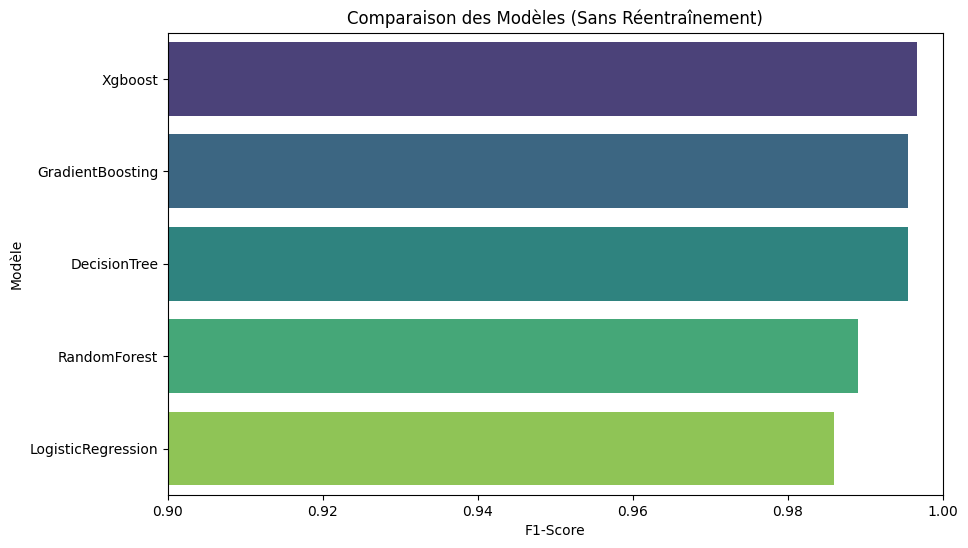

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

trained_models = {
    "DecisionTree": dt,         
    "GradientBoosting": gb,      
    "RandomForest": rf,          
    "LogisticRegression": Lr, 
    "Xgboost":Xg
}

results = []

for name, model in trained_models.items():
    y_pred = model.predict(X_test) 
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append([name, accuracy, precision, recall, f1])
df_results = pd.DataFrame(results, columns=["Modèle", "Accuracy", "Precision", "Recall", "F1-Score"])
df_results = df_results.sort_values(by="F1-Score", ascending=False)  

print(df_results)

plt.figure(figsize=(10, 6))
sns.barplot(x="F1-Score", y="Modèle", data=df_results, palette="viridis")
plt.xlabel("F1-Score")
plt.ylabel("Modèle")
plt.title("Comparaison des Modèles")
plt.xlim(0.9, 1.0)  
plt.show()


In [43]:
def predict_news(text):
    text_cleaned = preprocess_text(text)  
    text_vectorized = vectorization.transform([text_cleaned])  
    prediction = best_model.predict(text_vectorized)  

    return "Fake News" if prediction[0] == 1 else "True News"

In [45]:
best_model = Xg
example_text = "Breaking news: Scientists discover water on Mars!"
print(predict_news(example_text))

True News


In [46]:
joblib.dump(Xg, 'xgboost_model.pkl')

['xgboost_model.pkl']